<a href="https://colab.research.google.com/github/Sc2304Jose/Aplicacion/blob/main/Clasifcdor_Ropa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.6.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [8]:
len(train_labels)
print(train_labels )


[9 0 0 ... 3 0 5]


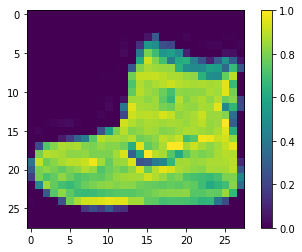

In [29]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

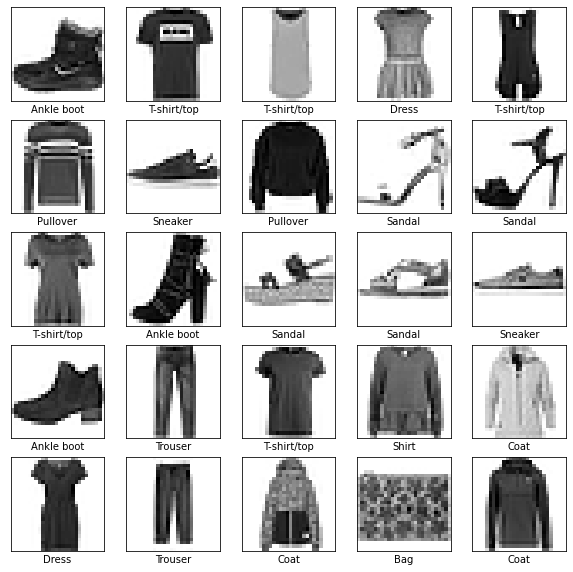

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

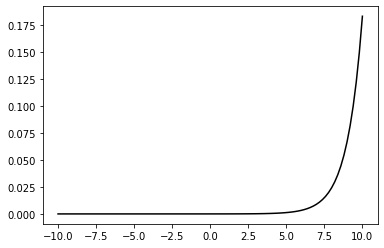

In [45]:
# Funcion de activacion Softmax

softmax = lambda x: np.exp(x) / np.sum(np.exp(x))

_x = np.linspace(-10,10,100)
plt.plot(_x,softmax(_x),c="black")

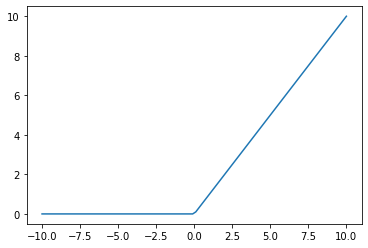

In [46]:
# funcion de activacion Relu (Rectificada lineal uniforme)

def relu(x):  
    return np.piecewise(x,[x<0.0,x>=0.0],[0,lambda x: x])

relu= lambda x:np.maximum(0,x) # otra forma de hacerlo

_x = np.linspace(-10,10,100)
#plt.plot(_x,relu(_x),c="blue")
plt.plot(_x,relu(_x))

In [41]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [42]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [43]:
historial=model.fit(train_images, train_labels, epochs=100, verbose = False)
model.fit(train_images, train_labels, epochs=10)

/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0542 - accuracy: 0.9801
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0495 - accuracy: 0.9812
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0532 - accuracy: 0.9801
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0491 - accuracy: 0.9815
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0521 - accuracy: 0.9808
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0500 - accuracy: 0.9808
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0504 - accuracy: 0.9811
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0468 - accuracy: 0.9823
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0499 - accuracy: 0.9813
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.050

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc) 

313/313 - 0s - loss: 0.3328 - accuracy: 0.8792

Test accuracy: 0.8791999816894531


In [17]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [18]:
predictions = probability_model.predict(test_images)

In [19]:
predictions[0]

array([1.9717093e-06, 3.1363991e-09, 1.1950321e-08, 9.0980626e-11,
       6.5828858e-09, 1.6851523e-03, 7.7359027e-07, 5.1167533e-02,
       3.6562315e-07, 9.4714421e-01], dtype=float32)

In [20]:
np.argmax(predictions[0])

9

In [21]:
test_labels[0]

9

In [23]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

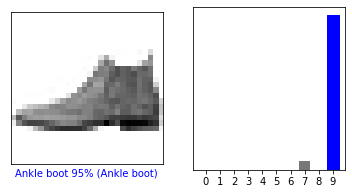

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

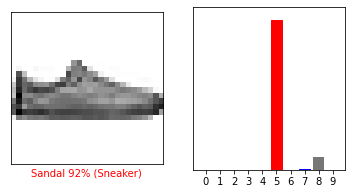

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

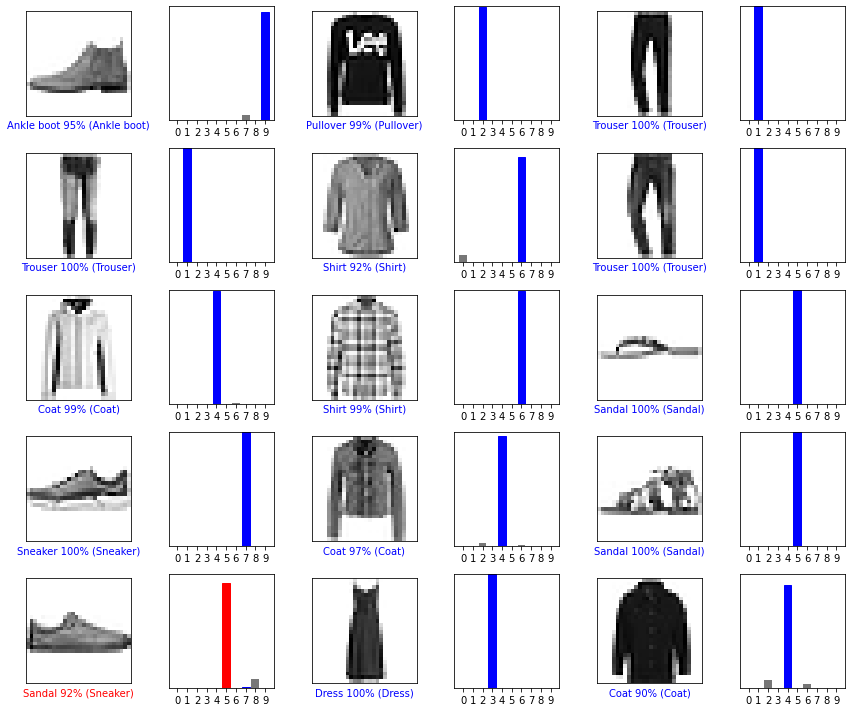

In [31]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

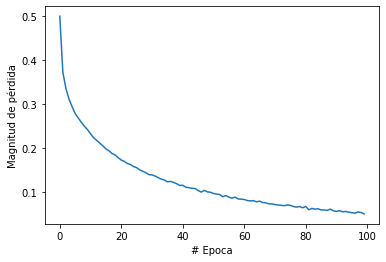

In [44]:

plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida") 
plt.plot(historial.history["loss"])